In [1]:
# Cargar a la memoria de trabajo las bibliotecas: Pandas (manejo de datos, 
# Numpy (numerical python) y la biblioteca de gráficas Matplotlib
# Se asignan nombres cortos.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Creamos un dataframe para nuetros datos.
df0 = pd.read_csv('vid18_180219.dat', sep=',')
df0.head()

,TIMESTAMP,RECORD,batt_volt_Min,logger_temp,short_up_Avg,short_dn_Avg,long_up_Avg,long_dn_Avg,cnr4_T_C_Avg,cnr4_T_K_Avg,...,Result2_Avg,Result3_Avg,Result4_Avg,Result5_Avg,Result6_Avg,Result7_Avg,Result8_Avg,Result9_Avg,Riego_mm_Tot,Perco_mm_Tot
0,2018-05-11 20:10:00,7980,12.31,25.87,-5.499501,1.581859,-82.19471,-4.002829,23.26391,296.4139,...,0.04,26.4,79.5,0.041,14.71,14.75,15.09,14.45,0.0,0
1,2018-05-11 20:20:00,7981,12.30,25.37,-4.934265,1.946161,-80.00718,-1.978131,22.75189,295.9019,...,0.04,26.4,79.5,0.041,14.71,14.75,15.09,14.45,0.0,0
2,2018-05-11 20:30:00,7982,12.28,24.91,-4.615617,2.407313,-76.72183,-1.868207,22.43361,295.5836,...,0.04,26.4,79.5,0.041,14.71,14.75,15.09,14.46,0.0,0
3,2018-05-11 20:40:00,7983,12.27,24.47,-4.433317,2.523456,-73.10189,-3.367143,22.08901,295.2390,...,0.04,26.4,79.5,0.041,14.71,14.75,15.09,14.45,0.0,0
4,2018-05-11 20:50:00,7984,12.26,24.09,-2.861873,3.898805,-70.19295,0.915511,22.08449,295.2345,...,0.04,26.4,79.5,0.041,14.70,14.76,15.08,14.46,0.0,0


In [3]:
#Creamos un DataFrame que únicamente me contenga a los únicos datos que nos interesan
#Nos interesan sólo: TIMESTAMP (Fecha) y  AirTC_Avg (Temperatura del aire, ºC).
df=pd.DataFrame({"Fecha": df0.TIMESTAMP, "Temperatura": df0.AirTC_Avg})
df.head()

,Fecha,Temperatura
0,2018-05-11 20:10:00,23.50
1,2018-05-11 20:20:00,22.96
2,2018-05-11 20:30:00,22.73
3,2018-05-11 20:40:00,22.40
4,2018-05-11 20:50:00,22.46


In [4]:
df.iloc[[24935]]


,Fecha,Temperatura
24935,2018-11-01 00:00:00,9.13


In [5]:
#Creo un dataframe en el cual 
df1=pd.DataFrame({"Fecha":df.Fecha[df.index>=24935],"Temp":df.Temperatura[df.index>=24935]})
df1.index=np.arange(0,len(df1))
df1.head()

,Fecha,Temp
0,2018-11-01 00:00:00,9.13
1,2018-11-01 00:10:00,8.89
2,2018-11-01 00:20:00,8.66
3,2018-11-01 00:30:00,8.52
4,2018-11-01 00:40:00,8.47


In [6]:
#Haciendo que mi columna fechas las reconozca como fechas.
df1['Fechas'] = pd.to_datetime(df1.apply(lambda x: x['Fecha'], 1), dayfirst=True)
df1 = df1.drop(['Fecha'], 1)

In [7]:
#Creando una columna para los años
df1['Año']=df1['Fechas'].dt.year
df1.head()
#Creando una columna para los mess
df1['Mes']=df1['Fechas'].dt.month
df1.head()
#Crando una columna para los días
df1['Día']=df1['Fechas'].dt.day
df1.head()
#Creando una columna para las horas
df1['Hora']=df1['Fechas'].dt.hour
df1.head()
#Creando una columna para los minutos
df1['Min']=df1['Fechas'].dt.minute
df1.head()

,Temp,Fechas,Año,Mes,Día,Hora,Min
0,9.13,2018-11-01 00:00:00,2018,11,1,0,0
1,8.89,2018-11-01 00:10:00,2018,11,1,0,10
2,8.66,2018-11-01 00:20:00,2018,11,1,0,20
3,8.52,2018-11-01 00:30:00,2018,11,1,0,30
4,8.47,2018-11-01 00:40:00,2018,11,1,0,40


In [8]:
#1.-Construye una tabla de unidades de frío acumuladas UF24 por cada día completo de datos del periodo de tiempo analizado,
#diseñando un algoritmo en Python para contabilizar las horas frío de acuerdo al modelo de Utah de Richardson.

In [9]:
#Número de horas de frío en un día (El frío de acuerdo al modelo de Utah Richardson)


In [10]:
df1['tphora']=df1.groupby(['Año','Mes','Día','Hora'])['Temp'].transform('mean')
df1.head()

,Temp,Fechas,Año,Mes,Día,Hora,Min,tphora
0,9.13,2018-11-01 00:00:00,2018,11,1,0,0,8.708333
1,8.89,2018-11-01 00:10:00,2018,11,1,0,10,8.708333
2,8.66,2018-11-01 00:20:00,2018,11,1,0,20,8.708333
3,8.52,2018-11-01 00:30:00,2018,11,1,0,30,8.708333
4,8.47,2018-11-01 00:40:00,2018,11,1,0,40,8.708333


In [11]:

df2=pd.DataFrame({"Fecha":df1[df1.Min==0].Fechas,"tphora":df1[df1.Min==0].tphora,"Hora":df1[df1.Min==0].Hora,"Día":df1[df1.Min==0].Día,"Mes":df1[df1.Min==0].Mes,"Año":df1[df1.Min==0].Año})
df2.index=np.arange(0,len(df1)/6)
df2.head()

,Fecha,tphora,Hora,Día,Mes,Año
0.0,2018-11-01 00:00:00,8.708333,0,1,11,2018
1.0,2018-11-01 01:00:00,8.493333,1,1,11,2018
2.0,2018-11-01 02:00:00,8.690000,2,1,11,2018
3.0,2018-11-01 03:00:00,8.846667,3,1,11,2018
4.0,2018-11-01 04:00:00,7.397500,4,1,11,2018


In [12]:
#HF = El número de horas frío por día (0 < T <= 10ºC)
#HFE = El número de horas frío efectivas por día ( HFE= HF - número de horas con T >= 25ºC)

#Variable que almacenará el valor, se le da un valor aleatorio para poder recetear
f=-7
k=-3
#Aquí se almancenará finalmente, es un arreglo, no se le da valor inicial. 
nhoraf=[]
nhorac=[]

#Creamos un loopque vaya almacenando el valor que sele asigna a la hora promedio conlascondiciones INIFAP-CECH
for i in range(0,len(df2.tphora)):
    if(df2["tphora"][i]>=25):
        f=0
        k=1
    if(df2["tphora"][i]>10 and df2["tphora"][i]<25):
        f=0
        k=0
    elif(df2["tphora"][i]>0 and df2["tphora"][i]<=10):
        f=1
        k=0
        
    elif(df2["tphora"][i]<=0):
        f=0
        k=0
        
#Le damos a nhora el valor de n
    nhoraf.append(f)
    nhorac.append(k)
#Le volvemos a darel valor de-7 para resetear y volver a empezar el loop 
    f=-7
    k=-3
#Creamos una columna con nuestros valores obtenidos en nuestros data frame 
df2["nhoraf"]=nhoraf
df2["nhorac"]=nhorac
#Mostramos los primeros 5 valores
df2.head()

,Fecha,tphora,Hora,Día,Mes,Año,nhoraf,nhorac
0.0,2018-11-01 00:00:00,8.708333,0,1,11,2018,1,0
1.0,2018-11-01 01:00:00,8.493333,1,1,11,2018,1,0
2.0,2018-11-01 02:00:00,8.690000,2,1,11,2018,1,0
3.0,2018-11-01 03:00:00,8.846667,3,1,11,2018,1,0
4.0,2018-11-01 04:00:00,7.397500,4,1,11,2018,1,0


In [13]:
#Hcemos las resta
df2["Efectivas"]=df2.nhoraf-df2.nhorac
df2.head()

,Fecha,tphora,Hora,Día,Mes,Año,nhoraf,nhorac,Efectivas
0.0,2018-11-01 00:00:00,8.708333,0,1,11,2018,1,0,1
1.0,2018-11-01 01:00:00,8.493333,1,1,11,2018,1,0,1
2.0,2018-11-01 02:00:00,8.690000,2,1,11,2018,1,0,1
3.0,2018-11-01 03:00:00,8.846667,3,1,11,2018,1,0,1
4.0,2018-11-01 04:00:00,7.397500,4,1,11,2018,1,0,1


In [14]:
#Sumamos todos los valores de las hora contabilizadas sobre el Efectivas con un group.by

df2["ndía"]=df2.groupby(["Año","Mes","Día"])["Efectivas"].transform("sum")

#Mostramos los primeros 5 valores de nuestra nueva tabla
df2.head()

,Fecha,tphora,Hora,Día,Mes,Año,nhoraf,nhorac,Efectivas,ndía
0.0,2018-11-01 00:00:00,8.708333,0,1,11,2018,1,0,1,2
1.0,2018-11-01 01:00:00,8.493333,1,1,11,2018,1,0,1,2
2.0,2018-11-01 02:00:00,8.690000,2,1,11,2018,1,0,1,2
3.0,2018-11-01 03:00:00,8.846667,3,1,11,2018,1,0,1,2
4.0,2018-11-01 04:00:00,7.397500,4,1,11,2018,1,0,1,2


In [15]:
#2.-Agrega dos columnas nuevas con las temperaturas Mínima y Máximas diarias del periodo de tiempo analizado.

In [16]:
df2["TempMin"]=df2.groupby(["Año","Mes","Día"])["tphora"].transform("max")
df2["TempMax"]=df2.groupby(["Año","Mes","Día"])["tphora"].transform("min")

df2.head()

,Fecha,tphora,Hora,Día,Mes,Año,nhoraf,nhorac,Efectivas,ndía,TempMin,TempMax
0.0,2018-11-01 00:00:00,8.708333,0,1,11,2018,1,0,1,2,28.621667,6.806833
1.0,2018-11-01 01:00:00,8.493333,1,1,11,2018,1,0,1,2,28.621667,6.806833
2.0,2018-11-01 02:00:00,8.690000,2,1,11,2018,1,0,1,2,28.621667,6.806833
3.0,2018-11-01 03:00:00,8.846667,3,1,11,2018,1,0,1,2,28.621667,6.806833
4.0,2018-11-01 04:00:00,7.397500,4,1,11,2018,1,0,1,2,28.621667,6.806833


In [17]:

#3.-Construye una gráfica con Matplotlib, mostrando la evolución de las temperaturas mínima y máxima en la misma gráfica.

In [21]:
#Hacemos que los valores no se repitan tanto debido a todas las horas en un día, por lo tanto tomamos solo el de la hora=0 
df3=pd.DataFrame({"TempMin":df2[df2.Hora==0].TempMin,"TempMax":df2[df2.Hora==0].TempMax,"Día":df2[df2.Hora==0].Día,"Fecha":df2[df2.Hora==0].Fecha,"ndía":df2[df2.Hora==0].ndía,"nhoraf":df2[df2.Hora==0].nhoraf,"nhorac":df2[df2.Hora==0].nhorac,"Efectivas":df2[df2.Hora==0].Efectivas})
#Le asignamos el indice desde cero hasta la longitud de nuestro dataframe original entre 24(Por que quitamos los valores)
df3.index=np.arange(0,len(df2)/24)
#Mostramos los valores 
df3.head()

,TempMin,TempMax,Día,Fecha,ndía,nhoraf,nhorac,Efectivas
0.0,28.621667,6.806833,1,2018-11-01,2,1,0,1
1.0,30.960000,10.248333,2,2018-11-02,-8,0,0,0
2.0,29.998333,10.473333,3,2018-11-03,-8,0,0,0
3.0,31.243333,11.670000,4,2018-11-04,-8,0,0,0
4.0,31.093333,11.435000,5,2018-11-05,-8,0,0,0


In [22]:
#4.-Construye una gráfica con Matplotlib, donde se grafique la acumulación de horas frío desde el primer día (suma de UF24).

In [27]:
#Creamos una variable acum que será una variable comodin
acum=0
#Acundía será el arreglo donde se arreglo donde se guardará la acumulación de los datos
acundía=[]

#Creamos un bucle para que los datos puedan irse sumando 
for i in range(0,len(df3.ndía)):
    acum=df3["ndía"][i]+acum
#Agendamos los valores de acum en acundía 
    acundía.append(acum)
    
#Creamos un Data frame donde tengamos nuestro valor de acumulación 
df4=pd.DataFrame({"Fecha": df3.Fecha, "AcumHoras":acundía})

#Mostramos los primeros valores
df4.head()

,Fecha,AcumHoras
0.0,2018-11-01,2
1.0,2018-11-02,-6
2.0,2018-11-03,-14
3.0,2018-11-04,-22
4.0,2018-11-05,-30


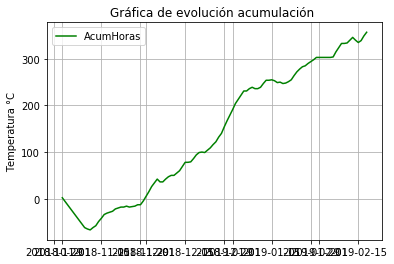

In [24]:
#Graficamos la la tabla de acumulación
#Ejes
plt.plot_date(x=df4.Fecha, y=df4.AcumHoras, fmt="g")
plt.legend(loc='best')
#Título
plt.title("Gráfica de evolución acumulación ")
plt.ylabel("Temperatura °C")
plt.grid(True)
#Guardamos la figura
plt.savefig('GrafTemp3', plt=2000)
plt.show()